In [1]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [221]:
y0 = [2921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #set initial concentration

t = np.linspace(0,3600*4, num=3600)

## define parameters

#Invertase reaction in the periplasmic space
Km_inv = 26.58 #mM 
vmax_inv = 1 #1 mM/min

#facilitated diffusion
Km_glcfd = 1.19 #mM
vmax_glcfd = 0.36 
Km_frcfd = 20 
vmax_frcfd = 0.36

#hexokinases and PGI
Km_hexglc = 0.36 
vmax_hexglc = 156 
Km_hexfrc = 0.84
vmax_hexfrc = 390
Km_g6pi = 0.3
vmax_g6pi = 1.26

#PFK
Km_pfk = 0.111
vmax_pfk = 0.68

#ALD/FBA
Km_ald = 2.4
vmax_ald = 1.19

#GAPD
Km_gapd = 9.8e-3
vmax_gapd = 4.4

#PGK
Km_pgk = 0.53
vmax_pgk = 4.8

#PGM
Km_pgm = 0.1
vmax_pgm = 9.4

#ENO
Km_eno = 0.5
vmax_eno = 1.35

#PYK
Km_pyk = 21
vmax_pyk = 4.05

#PDC
Km_pdc = 1.11
vmax_pdc = 0.65

#ADH (alcohol dehydrogenase)
Km_adh = 17
vmax_adh = 3

#etoh transport by simple diffusion

#make list
params1 = [Km_inv, vmax_inv, Km_glcfd, vmax_glcfd, Km_frcfd, vmax_frcfd, Km_hexglc, vmax_hexglc, Km_hexfrc, vmax_hexfrc, Km_g6pi, vmax_g6pi,
          Km_pfk, vmax_pfk, Km_ald, vmax_ald, Km_gapd, vmax_gapd, Km_pgk, vmax_pgk, Km_pgm, vmax_pgm, Km_eno, vmax_eno, Km_pyk, vmax_pyk, Km_pdc, vmax_pdc,
          Km_adh, vmax_adh]

In [222]:
def sim1(variables, t, params1):
    
    #define variables
    
    sucrose_e = variables[0]
    glucose_e = variables[1]
    fructose_e = variables[2]
    glucose_c = variables[3]
    fructose_c = variables[4]
    g6p = variables[5]
    f6p = variables[6]
    fdp = variables[7]
    g3p = variables[8]
    _13dpg = variables[9]
    _3pg = variables[10]
    _2pg = variables[11]
    pep = variables[12]
    pyruvate = variables[13]
    acald = variables[14]
    etoh = variables[15]
    
    #index parameters
    Km_inv = params1[0]
    vmax_inv = params1[1]
    Km_glcfd = params1[2]
    vmax_glcfd = params1[3]
    Km_frcfd = params1[4]
    vmax_frcfd = params1[5]
    Km_hexglc = params1[6]
    vmax_hexglc = params1[7]
    Km_hexfrc = params1[8]
    vmax_hexfrc = params1[9]
    Km_g6pi = params1[10]
    vmax_g6pi = params1[11]
    Km_pfk = params1[12]
    vmax_pfk = params1[13]
    Km_ald = params1[14] 
    vmax_ald = params1[15]
    Km_gapd = params1[16] 
    vmax_gapd = params1[17]
    Km_pgk = params1[18]
    vmax_pgk = params1[19]
    Km_pgm = params1[20]
    vmax_pgm = params1[21]
    Km_eno = params1[22] 
    vmax_eno = params1[23]
    Km_pyk = params1[24]
    vmax_pyk = params1[25]
    Km_pdc = params1[26]
    vmax_pdc = params1[27]
    Km_adh = params1[28]
    vmax_adh = params1[29]

    
    #write Michaelis-Menten rate expressions
    v1 = (vmax_inv*sucrose_e)/(Km_inv + sucrose_e)
    fdglc = (vmax_glcfd*glucose_e)/(Km_glcfd + glucose_e)
    fdfrc = (vmax_frcfd*fructose_e)/(Km_frcfd + fructose_e)
    v2glc = (vmax_hexglc*glucose_c)/(Km_hexglc + glucose_c)
    v2frc = (vmax_hexfrc*fructose_c)/(Km_hexfrc + fructose_c)
    v3 = (vmax_g6pi*g6p)/(Km_g6pi + g6p)
    v4 = (vmax_pfk*f6p)/(Km_pfk + f6p)
    v5 = (vmax_ald*fdp)/(Km_ald + fdp)
    v6 = (vmax_gapd*g3p)/(Km_gapd + g3p)
    v7 = (vmax_pgk*_13dpg)/(Km_pgk + _13dpg)
    v8 = (vmax_pgm*_3pg)/(Km_pgm + _3pg)
    v9 = (vmax_eno*_2pg)/(Km_eno + _2pg)
    v10 = (vmax_pyk*pep)/(Km_pyk + pep)
    v11 = (vmax_pdc*pyruvate)/(Km_pdc + pyruvate)
    v12 = (vmax_adh*acald)/(Km_adh + acald)
    
    #write ODEs
    dsucrosedt = -v1
    dglucose_edt = v1 - fdglc
    dfructose_edt = v1 - fdfrc
    dglucose_cdt = fdglc - v2glc
    dfructose_cdt = fdfrc - v2frc
    dg6pdt = v2glc - v3
    df6pdt = v2frc + v3 - v4
    dfdpdt = v4 - v5
    dg3pdt = v5 - v6
    d13dpgdt = v6 - v7
    d3pgdt = v7 - v8
    d2pgdt = v8 - v9
    dpepdt = v9 - v10
    dpyruvatedt = v10 - v11
    dacalddt = v11 - v12
    detohdt = v12
    

    return([dsucrosedt, dglucose_edt, dfructose_edt, dglucose_cdt, dfructose_cdt, dg6pdt, df6pdt, dfdpdt, dg3pdt, d13dpgdt, d3pgdt, d2pgdt, dpepdt, dpyruvatedt, dacalddt, detohdt])

In [223]:
#solve ODEs by integration
y = odeint(sim1, y0, t, args=(params1,))

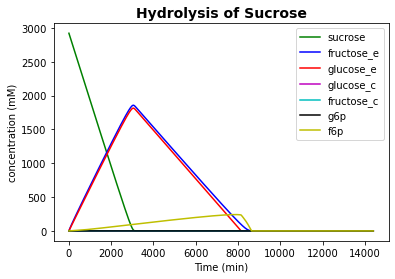

In [227]:

#plot in a graph
f, ax = plt.subplots(1)

line1, = ax.plot(t , y[:,0], color="g",label="sucrose")
line3, = ax.plot(t , y[:,2], color="b",label="fructose_e")
line2, = ax.plot(t , y[:,1], color="r",label="glucose_e")
line4, = ax.plot(t , y[:,3], color="m",label="glucose_c")
line5, = ax.plot(t , y[:,4], color="c",label="fructose_c")
line6, = ax.plot(t , y[:,5], color="k",label="g6p")
line7, = ax.plot(t , y[:,6], color="y",label="f6p")

plt.title("Hydrolysis of Sucrose", fontweight = "bold", fontsize = 14)
ax.set_ylabel('concentration (mM)')
ax.set_xlabel('Time (min)')

ax.legend(handles=[line1,line3,line2,line4, line5, line6, line7])

plt.savefig("C:/Users/Nayyara/Downloads/invertase model cont1")

plt.show()

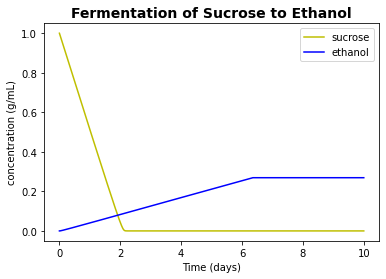

In [228]:
#plot in a graph
f, ax = plt.subplots(1)

line1, = ax.plot(t/60/24 , y[:,0]/1000000*342.3, color="y",label="sucrose")
linef, = ax.plot(t/60/24 , y[:,15]/1000000*46.07, color="b",label="ethanol")

plt.title("Fermentation of Sucrose to Ethanol", fontweight = "bold", fontsize = 14)
ax.set_ylabel('concentration (g/mL)')
ax.set_xlabel('Time (days)')

ax.legend(handles=[line1, linef])

plt.savefig("C:/Users/Nayyara/Downloads/sucrose to etoh")

plt.show()